#### 전국 도시공원 표준 데이터

* https://github.com/corazzon/OpenDataWrangling/blob/master/store_location_by_folium.ipynb
* https://www.data.go.kr/dataset/15012890/standard.do
* 전국 도시의 공원에 대한 분포를 시각화
* 어떤 공원이 어느 지역에 어떻게 분포되어 있는지를 위경도로 표현
* 필요한 패키지는 `pandas`, `plotnine`, `folium`를 사용
 - plotnine은 R의 ggplot2에 기반해 그래프를 시각화하는 라이브러리이다.
   -  https://github.com/has2k1/plotnine
 - folium은 'Open Street Map'과 같은 지도데이터에 'Leaflet.js'를 이용하여 위치정보를 시각화하기 위한 라이브러리이다.
    - https://github.com/python-visualization/folium
* !pip install plotnine or !conda install plotnine
* 공공데이터포털에는 이외에 여러가지 형태의 자료를 제공한다.

###### Python에서 데이터 시각화하는 다양한 방법
* https://zzsza.github.io/development/2018/08/24/data-visualization-in-python/

In [1]:
!pip show plotnine
!pip show folium

Name: plotnine
Version: 0.6.0
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: None
Author-email: None
License: GPL-2
Location: c:\anaconda3\lib\site-packages
Requires: patsy, descartes, mizani, pandas, numpy, scipy, matplotlib, statsmodels
Required-by: 
Name: folium
Version: 0.10.1
Summary: Make beautiful maps with Leaflet.js & Python
Home-page: https://github.com/python-visualization/folium
Author: Rob Story
Author-email: wrobstory@gmail.com
License: MIT
Location: c:\anaconda3\lib\site-packages
Requires: requests, numpy, branca, jinja2
Required-by: 


In [2]:
# jupyter notebook에서 warning무시하기
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
from plotnine import *
import folium # 지도 표현을 위해
import re

In [5]:
# 한글폴더 및 한글파일명으로된 파일을 불러올 때 'Initiallizing from 
# file faild'에러가 발생할 때 engine='python'으로 해결
park = pd.read_csv('../data/data분석/전국도시공원표준데이터.csv',
                   engine='python', encoding='EUC-KR')
park.shape
display(park.head())

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,광주광역시 북구 문흥동 1009-1,35.184917,126.916686,87710.3,NaN,NaN,NaN,NaN,NaN,1990-12-31,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,광주광역시 북구 두암동 969-4,35.165104,126.937650,13383.5,NaN,NaN,NaN,NaN,NaN,1990-12-12,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
2,29170-00003,첨단체육근린공원,근린공원,광주광역시 북구 임방울대로 877,광주광역시 북구 오룡동 1113,35.220546,126.858765,170920.6,NaN,NaN,NaN,NaN,NaN,1991-12-12,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
3,29170-00004,일곡제1근린공원,근린공원,광주광역시 북구 일곡로 55,광주광역시 북구 일곡동 850-1,35.207975,126.895445,34840.3,NaN,NaN,NaN,NaN,NaN,1993-12-06,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
4,29170-00005,일곡제2근린공원,근린공원,광주광역시 북구 설죽로 526,광주광역시 북구 일곡동 820-2,35.206500,126.898395,10315.0,NaN,NaN,NaN,NaN,NaN,1993-12-06,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN


In [6]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          16096 non-null  object 
 1   공원명           16096 non-null  object 
 2   공원구분          16096 non-null  object 
 3   소재지도로명주소      8321 non-null   object 
 4   소재지지번주소       15213 non-null  object 
 5   위도            16096 non-null  float64
 6   경도            16096 non-null  float64
 7   공원면적          16096 non-null  float64
 8   공원보유시설(운동시설)  4164 non-null   object 
 9   공원보유시설(유희시설)  6085 non-null   object 
 10  공원보유시설(편익시설)  4344 non-null   object 
 11  공원보유시설(교양시설)  914 non-null    object 
 12  공원보유시설(기타시설)  2503 non-null   object 
 13  지정고시일         13512 non-null  object 
 14  관리기관명         15381 non-null  object 
 15  전화번호          14966 non-null  object 
 16  데이터기준일자       16096 non-null  object 
 17  제공기관코드        16096 non-null  object 
 18  제공기관명         16096 non-nu

In [7]:
# null, NaN값을 확인
park.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소         7775
소재지지번주소           883
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    11932
공원보유시설(유희시설)    10011
공원보유시설(편익시설)    11752
공원보유시설(교양시설)    15182
공원보유시설(기타시설)    13593
지정고시일            2584
관리기관명             715
전화번호             1130
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     16096
dtype: int64

#####  누락데이터의 시각화 : missingno

###### 1.누락데이터의 시각화
데이터의 크기가 크면 어디에 누락데이터가 분포해 있는지 확인하기 힘들다. 이 때는 시각화를 통해 전체적인 누락데이터의 분포를 확인 할 수 있다. Missingno 패키지를 사용하면 누락데이터에 대한 시각화를 쉽게 할 수 있다.

###### 2. 누락 데이터의 종류
누락 데이터는 MCAR(Missing completely at random)과 MAR(Missing at random) 그리고 MNAR(Missing at not random)으로 나눌 수 있다.

* MCAR : MCAR은 변수의 종류와 변수의 값과 상관없이 전체에 걸쳐 무작위적으로 나타나는 것으로 이러한 누락 데이터는 분석에 큰 영향을 주지는 않는다. 실제로 MCAR의 경우는 거의 없다.
* MAR : 누락된 자료가 특정 변수와 관련되어 일어나지만 그 변수의 값과는 관계가 없는 경우이다. 예를 들어 어떤 설문조사에서 누락된 자료가 특정 변수들에 국한되어 발견되었는데 알고 보니 일부 대상자가 설문지 3페이지에 반대쪽 면이 있는 것을 모르고 채우지 않았을 경우 MAR로 볼 수 있다.
* MNAR : 누락된 변수의 값과 누락된 이유가 관련이 있는 경우이다. 예를 들어 노인에서 우울증에 대한 설문조사를 했는데 실제로 우울증이 심한 경우는 우울한 기분에 대해 자세히 조사하는 항목을 대답하는 것이 괴로워 일부러 회피하여 누락되는 경우 등이다. 일부 설문에 정치적인 이유로 일부러 대답을 회피하거나 하는 경우도 MNAR로 볼수 있다.

###### 3. 설치
>* pip install missingno
* https://github.com/ResidentMario/missingno

>데이터를 사용하려면, 다음과 같이 먼저 데이터를 다운로드 받아야 한다.
* pip install quilt
* !quilt install ResidentMario/missingno_data

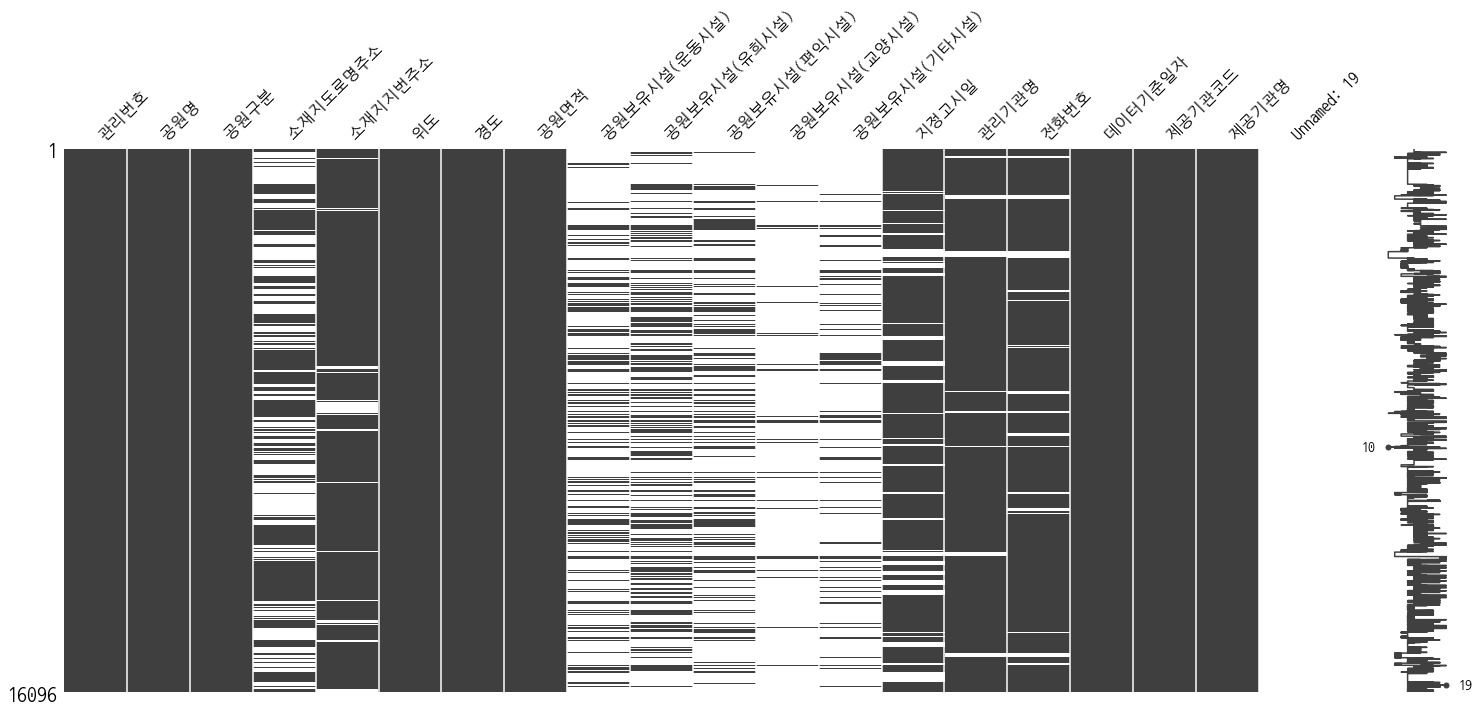

In [8]:
import missingno as msno
msno.matrix(park)

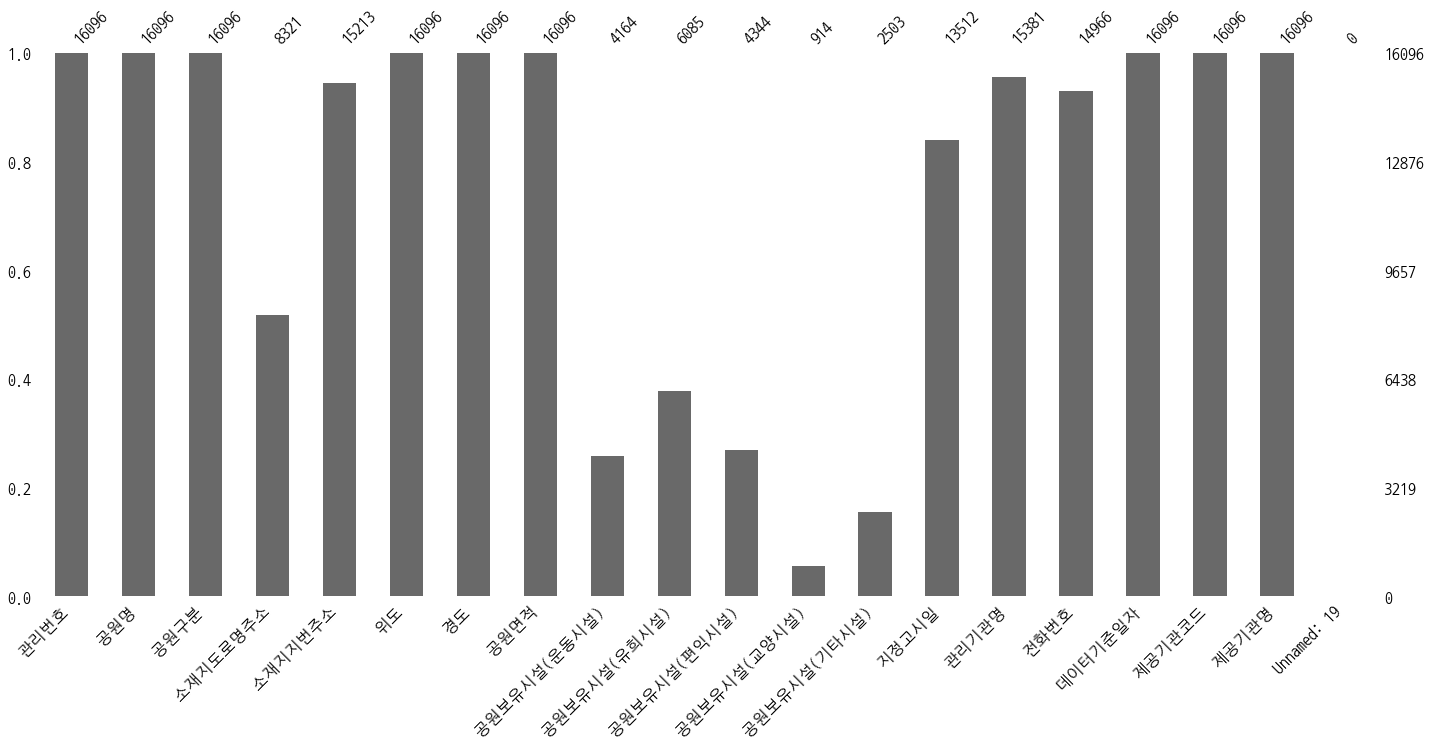

In [9]:
# 누락데이터가 얼마나 존재하는지를 시각화할 경우 bar()함수 사용
msno.bar(park)

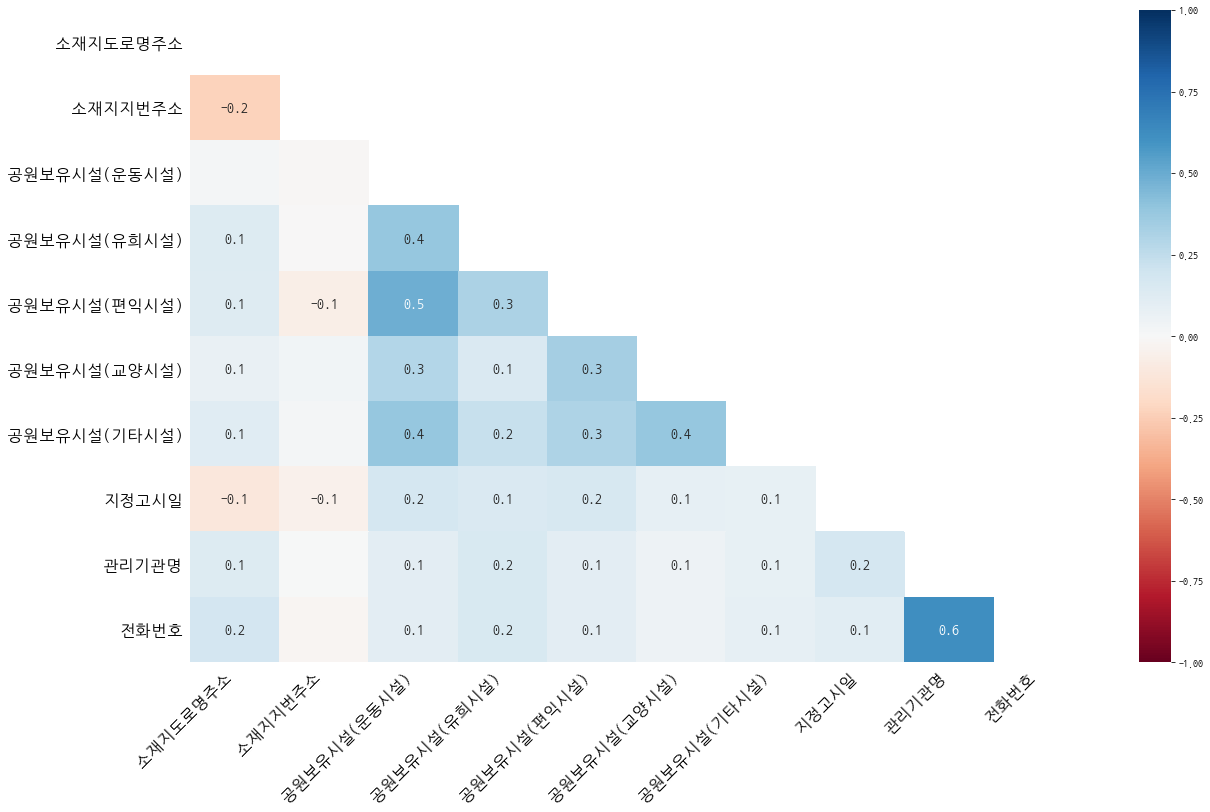

In [10]:
# heatmap : 색상코딩시스템을 사용해 다양한 값을 나타내는 데이터의 
# 그래픽으로 표현. 히트맵은 다양한 형태의 분석에 사용되지만 특정
# 웹피이지 및 웹템플렛에서 사용자 행동을 표시하는데 가장 일반적
# 으로 사용된다.
msno.heatmap(park)

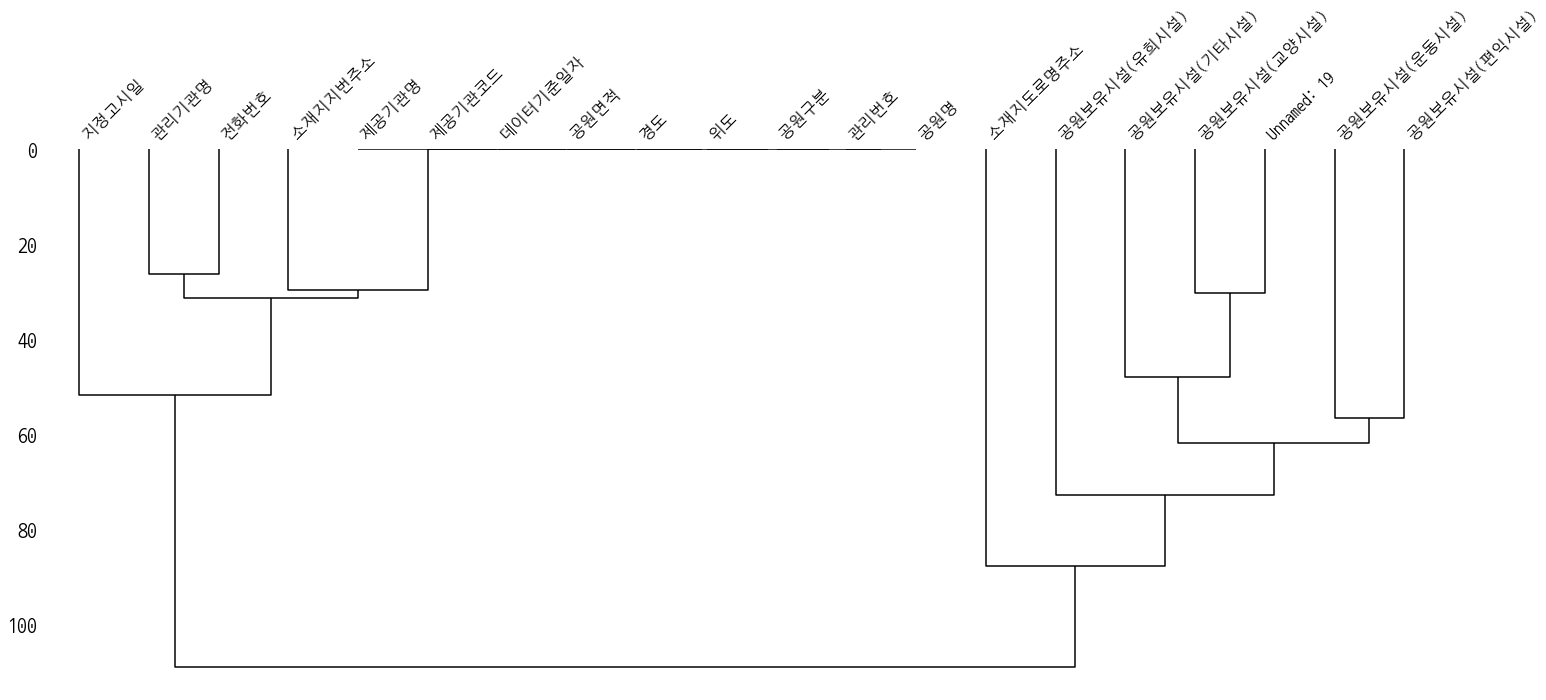

In [11]:
# dedrogram : 각 단계에서 관측치의 군집화를 통해 그룹과 이들의 유사성
# 수준을 표시하는 트리다이어그램을 말한사. 유사성의 수준은 수직측을 
# 따라 측정되거나 사용자가 거리수준을 표시할 수 있다.
msno.dendrogram(park)

###### 1. 불필요한 컬럼을 제거하기

In [12]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [13]:
park.drop(columns=['공원보유시설(운동시설)', 
                   '공원보유시설(유희시설)', 
                   '공원보유시설(편익시설)',
                   '공원보유시설(교양시설)',
                   '공원보유시설(기타시설)',
                   '지정고시일', 
                   '관리기관명',
                   'Unnamed: 19'
                  ], inplace=True)

In [14]:
park.shape

(16096, 12)

###### 2. 위경도 시각화 (이상치제거)

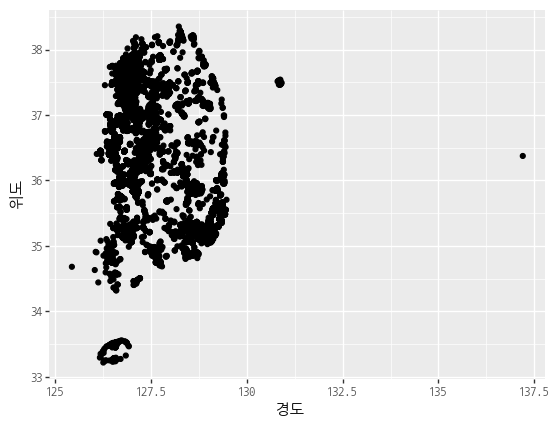

<ggplot: (-9223371874569393840)>

In [15]:
# 위경도자료를 기준으로 전국 도시 공원을 출력해니까 특정지역에만 분포를 확인
# 결측치인 NaN데이터와 이상치 때문에 다른 데이터가 제대로 보이지 않는다.
(ggplot(park)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumGothicCoding'))
)

In [16]:
# 이상치 자료 확인 
display(park[park['경도'] > 135.0])
display(park[park['위도'] < 30.0])
display(park[park['위도'] > 38.5])

# 이상치 제거
park = park.drop(index=[840])
park.shape

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명
840,43113-00080,근린공원5(만수공원),근린공원,NaN,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,043-201-7233,2018-08-16,5710000,충청북도 청주시


,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명


,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명


(16095, 12)

###### 3. 데이터 전처리

* 시도 결측치 처리
  - 다른 데이터로 대체
  - 도로명 혹은 지번 둘 중 하나만 있다면 다른 데이터로 대체
* 아웃라이어(이상치) 데이터 제거 혹은 대체
  - 위경도가 국내 범위를 벗어나는 데이터의 경우를 제외

In [17]:
display(park.dtypes)
# 공원면적 데이터타입이 float64이기 때문에 park['공원면적'].str을 사용할 수 없다.
# 만약에 숫자데이터에 콤마(,)가 포함되어 있다면 
# park['공원면적'] =  park['공원면적'].str.replace(',', '').astype(float64)
display(park['공원면적'].head())

관리번호         object
공원명          object
공원구분         object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
공원면적        float64
전화번호         object
데이터기준일자      object
제공기관코드       object
제공기관명        object
dtype: object

0     87710.3
1     13383.5
2    170920.6
3     34840.3
4     10315.0
Name: 공원면적, dtype: float64

In [18]:
# 그래프에 면적에 따라 크기를 표현하기 위해서 공원면적비율을 설정
park['공원면적비율'] = park['공원면적'].apply(lambda x: np.sqrt(x)*0.01)
park['공원면적비율'].head()

0    2.961592
1    1.156871
2    4.134254
3    1.866556
4    1.015628
Name: 공원면적비율, dtype: float64

In [19]:
# 도로명 주소의 널값의 갯수
print(park['소재지도로명주소'].isnull().sum())

# 지번주소의 널값의 갯수
print(park['소재지지번주소'].isnull().sum())

7774
883


In [20]:
# 1. 도로명 주소의 널값이면서 지번주소가 notnull의 갯수
park.loc[park['소재지도로명주소'].isnull() & park['소재지지번주소'].notnull()].shape

# 2. 소재지도로명주소의 결측치를 소재지지번주소로 채워주기
# fillna()
park['소재지도로명주소'].fillna(park['소재지지번주소'], inplace=True)

In [21]:
print(park['소재지도로명주소'].isnull().sum())

0


In [22]:
park_loc = park.loc[(park['소재지도로명주소'].isnull()) & (park['소재지지번주소'].notnull())]
park_loc.shape

(0, 13)

In [23]:
# 시도 컬럼추가
park['시도'] = park['소재지도로명주소'].str.split(' ', expand=True)[0]
park.head()        

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,광주광역시 북구 문흥동 1009-1,35.184917,126.916686,87710.3,062-410-6438,2018-04-17,3620000,광주광역시 북구,2.961592,광주광역시
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,광주광역시 북구 두암동 969-4,35.165104,126.937650,13383.5,062-410-6438,2018-04-17,3620000,광주광역시 북구,1.156871,광주광역시
2,29170-00003,첨단체육근린공원,근린공원,광주광역시 북구 임방울대로 877,광주광역시 북구 오룡동 1113,35.220546,126.858765,170920.6,062-410-6438,2018-04-17,3620000,광주광역시 북구,4.134254,광주광역시
3,29170-00004,일곡제1근린공원,근린공원,광주광역시 북구 일곡로 55,광주광역시 북구 일곡동 850-1,35.207975,126.895445,34840.3,062-410-6438,2018-04-17,3620000,광주광역시 북구,1.866556,광주광역시
4,29170-00005,일곡제2근린공원,근린공원,광주광역시 북구 설죽로 526,광주광역시 북구 일곡동 820-2,35.206500,126.898395,10315.0,062-410-6438,2018-04-17,3620000,광주광역시 북구,1.015628,광주광역시


In [24]:
# 구군 컬럼추가
park['구군'] = park['소재지도로명주소'].str.split(' ', expand=True)[1]
park.head()      

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도,구군
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,광주광역시 북구 문흥동 1009-1,35.184917,126.916686,87710.3,062-410-6438,2018-04-17,3620000,광주광역시 북구,2.961592,광주광역시,북구
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,광주광역시 북구 두암동 969-4,35.165104,126.937650,13383.5,062-410-6438,2018-04-17,3620000,광주광역시 북구,1.156871,광주광역시,북구
2,29170-00003,첨단체육근린공원,근린공원,광주광역시 북구 임방울대로 877,광주광역시 북구 오룡동 1113,35.220546,126.858765,170920.6,062-410-6438,2018-04-17,3620000,광주광역시 북구,4.134254,광주광역시,북구
3,29170-00004,일곡제1근린공원,근린공원,광주광역시 북구 일곡로 55,광주광역시 북구 일곡동 850-1,35.207975,126.895445,34840.3,062-410-6438,2018-04-17,3620000,광주광역시 북구,1.866556,광주광역시,북구
4,29170-00005,일곡제2근린공원,근린공원,광주광역시 북구 설죽로 526,광주광역시 북구 일곡동 820-2,35.206500,126.898395,10315.0,062-410-6438,2018-04-17,3620000,광주광역시 북구,1.015628,광주광역시,북구


In [25]:
park.describe

<bound method NDFrame.describe of               관리번호        공원명  공원구분                  소재지도로명주소  \
0      29170-00001     문화근린공원  근린공원           광주광역시 북구 대천로 86   
1      29170-00002   두암제1근린공원  근린공원           광주광역시 북구 삼정로 36   
2      29170-00003   첨단체육근린공원  근린공원        광주광역시 북구 임방울대로 877   
3      29170-00004   일곡제1근린공원  근린공원           광주광역시 북구 일곡로 55   
4      29170-00005   일곡제2근린공원  근린공원          광주광역시 북구 설죽로 526   
...            ...        ...   ...                       ...   
16091  44800-00082  홍성읍24호소공원   소공원   충청남도 홍성군 홍성읍 오관리 472 일원   
16092  47760-00002       서부공원  근린공원   경상북도 영양군 영양읍 군민회관길 42-6   
16093  47760-00003       입암공원  근린공원  경상북도 영양군 입암면 신구리 산27-5번지   
16094  47760-00004       수비공원  근린공원    경상북도 영양군 수비면 발리리 산48번지   
16095  47760-00005  삼지연꽃 테마파크  수변공원    경상북도 영양군 영양읍 삼지리 200번지   

                        소재지지번주소         위도          경도      공원면적  \
0           광주광역시 북구 문흥동 1009-1  35.184917  126.916686   87710.3   
1            광주광역시 북구 두암동 969-4  35.165104  126.9

In [26]:
# 지도로 위도와 경도의 아웃라이어 데이터를 제외하고 출력
# 조금 더 정확하게 출력하려면 대한민국의 위경도 데이터의 범위를 지정
park_loc_notnull = park.loc[(park['위도'] > 32) & (park['경도'] < 132) & park['시도'].notnull()]
park_loc_notnull.shape

(16095, 15)

In [27]:
park.loc[(park['위도'] < 32) & (park['경도'] > 132)]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도,구군


In [28]:
# park_loc_notnull에서 시도별로 공원의 건수
park_loc_notnull['시도'].value_counts()

경기도        3250
경상남도       1814
충청남도       1708
서울특별시      1330
전라북도       1138
전라남도        925
충청북도        910
울산광역시       833
경상북도        785
강원도         724
대구광역시       580
부산광역시       530
인천광역시       507
대전광역시       384
광주광역시       362
제주특별자치도     245
세종특별자치시      70
Name: 시도, dtype: int64

##### 전국 공원데이터 시각화

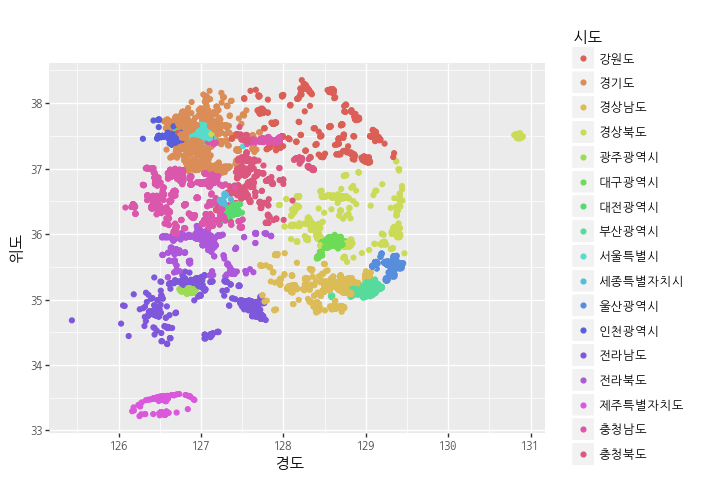

<ggplot: (-9223371874569269740)>

In [29]:
# 1. 시도별 공원 데이터 시각화
# ggplot(), aes(x,y,color) : 시도별로 공원의 색상을 다르게
(ggplot(park_loc_notnull)
 + aes(x='경도', y='위도', color='시도')
 + geom_point()
 + theme(text=element_text(family='NanumGothicCoding'))
)

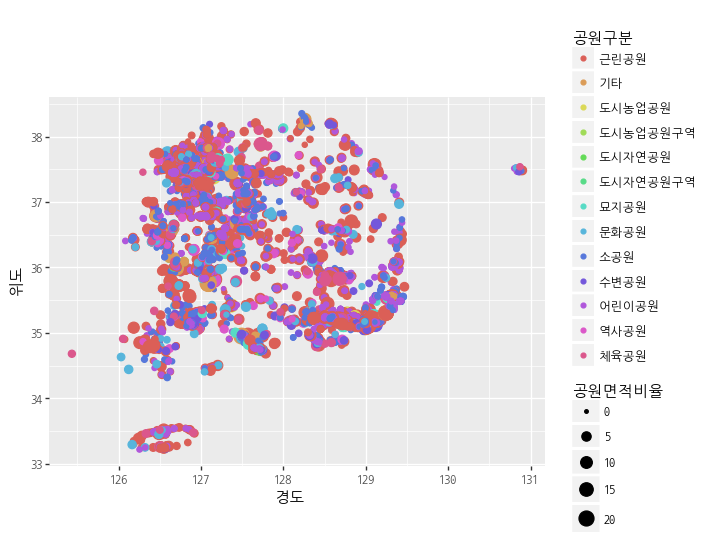

<ggplot: (-9223371874568855240)>

In [30]:
# 2. 공원구분별 분포도
(ggplot(park_loc_notnull)
 + aes(x='경도', y='위도', color='공원구분', size='공원면적비율')
 + geom_point()
 + theme(text=element_text(family='NanumGothicCoding'))
)

# 분석결과
# 전국적으로 어린이 공원이 가장 많이 분포되어 있다.
# 제주도는 한라산 아래 해안선을 기준으로 근린공원이 많이 배치되어 있음을 알 수가 있다.

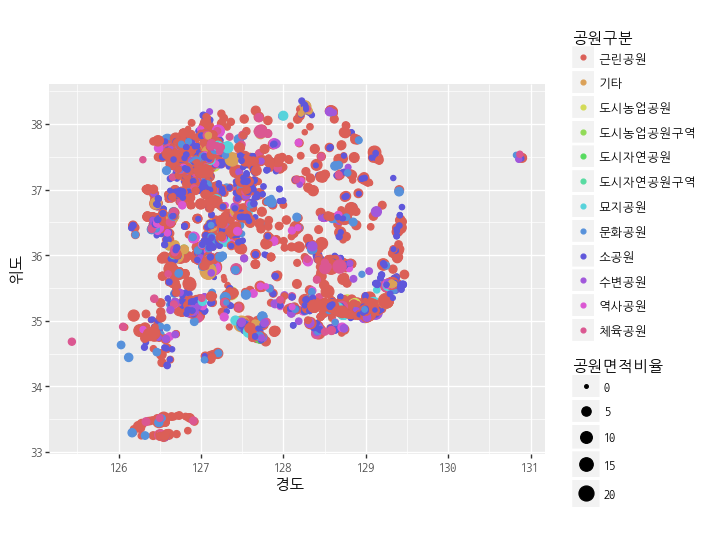

<ggplot: (-9223371874568809952)>

In [31]:
# 3. 어린이 공원을 제외한 공원구분별 분포도
(ggplot(park_loc_notnull.loc[park_loc_notnull['공원구분'] != '어린이공원'])
 + aes(x='경도', y='위도', color='공원구분', size='공원면적비율')
 + geom_point()
 + theme(text=element_text(family='NanumGothicCoding'))
)

# 분석결과
# 어린이 공원을 제외하면 그 다음으로 근린공원과 소공원 분포가 많다.

In [32]:
# 4. 시도별 공원비율
park_sido = pd.DataFrame(park['시도'].value_counts())
park_sido_normalize = pd.DataFrame(park['시도'].value_counts(normalize=True))
park_sido = park_sido.merge(park_sido_normalize, left_index=True,
                           right_index=True).reset_index()
park_sido.columns = ['시도', '합계', '비율']
park_sido.sort_values(by=['합계'],  ascending=False) 

,시도,합계,비율
0,경기도,3250,0.201926
1,경상남도,1814,0.112706
2,충청남도,1708,0.106120
3,서울특별시,1330,0.082634
4,전라북도,1138,0.070705
5,전라남도,925,0.057471
6,충청북도,910,0.056539
7,울산광역시,833,0.051755
8,경상북도,785,0.048773
9,강원도,724,0.044983


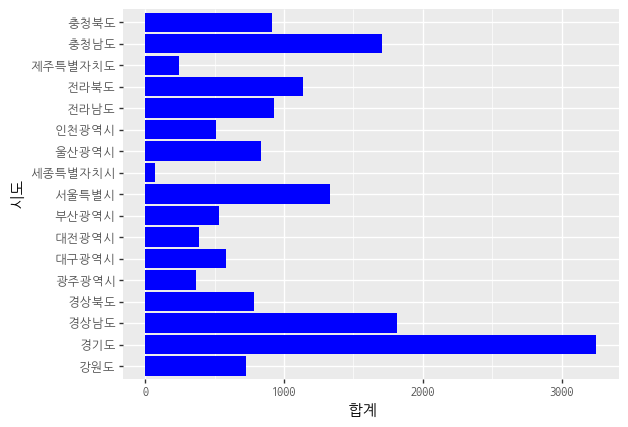

<ggplot: (-9223371874569190096)>

In [33]:
(ggplot(park_sido.sort_values(by=['합계'],  ascending=False))
 + aes(x='시도', y='합계')
 # geom_bar()의 옵션 stat='identity'는 반드시 정의해야하는 옵션이다.
 # stat='identity' : y축의 높이를 데이터의 값으로 하는 bar그래프의 형태를 지정
 # position : 막대의 위치, dodge옵션은 막대의 위치를 개별적인 막대로 나란히 표현하는 옵션
 + geom_bar(stat='identity', fill='blue', position='dodge')
 # coord는 coordinate의 약자로 그래를 조정하고 꾸민다는 의미
 # flip은 '뒤집다'의미. 즉, coord_flip()은 x축과 y축의 구성을 뒤접어 표현하는 옵션
 # x축과 y축의 위치가 바뀜과 동시에 가로의 막대로값을 표현하는 bar그래프가 그려지도록 한다.
 + coord_flip()
 + theme(text=element_text(family='NanumGothicCoding'))
)

# 분석결과
# 경기도가 공원수가 압도적으로 많다.

In [34]:
# 실습
# 5. 공원구분별 합계를 구한후 해당데이터로 공원구분별 bar그래프로 시각화하기
park_type = park['공원구분'].value_counts().reset_index()
park_type.columns = ('공원구분', '합계')
park_type

,공원구분,합계
0,어린이공원,8999
1,근린공원,3800
2,소공원,2209
3,문화공원,257
4,수변공원,242
5,체육공원,208
6,기타,180
7,역사공원,143
8,묘지공원,40
9,도시농업공원,10


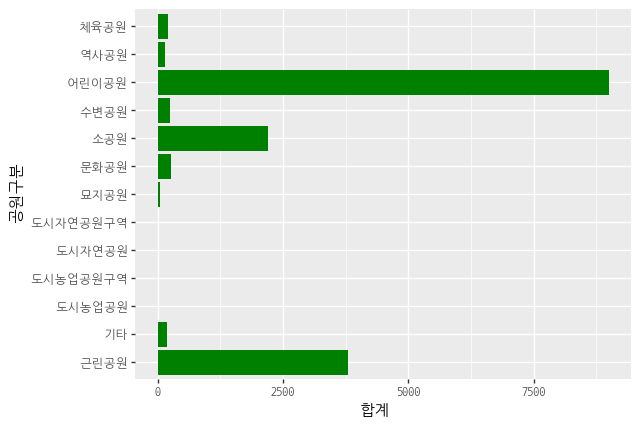

<ggplot: (-9223371874569188568)>

In [35]:
(ggplot(park_type)
 + aes(x='공원구분', y='합계')
 + geom_bar(stat='identity', fill='green', position='dodge')
 + coord_flip()
 + theme(text=element_text(family='NanumGothicCoding'))
)

##### 경기도 관할 공원 분포

* 경기도에 가장 많은 공원이 분포되어 있는데 어떻게 분포되어있는지를 분석후 시각화
* folium을 이용한 지도 위치정보 시각화

In [36]:
park.head()
gg = park.loc[park['시도'] == '경기도']
gg.shape

(3250, 15)

In [37]:
gg_park = gg['공원구분'].value_counts().reset_index()
gg_park.columns = ('공원구분', '합계')
gg_park

,공원구분,합계
0,어린이공원,1748
1,근린공원,818
2,소공원,415
3,문화공원,80
4,체육공원,71
5,수변공원,58
6,역사공원,32
7,기타,17
8,묘지공원,8
9,도시농업공원,3


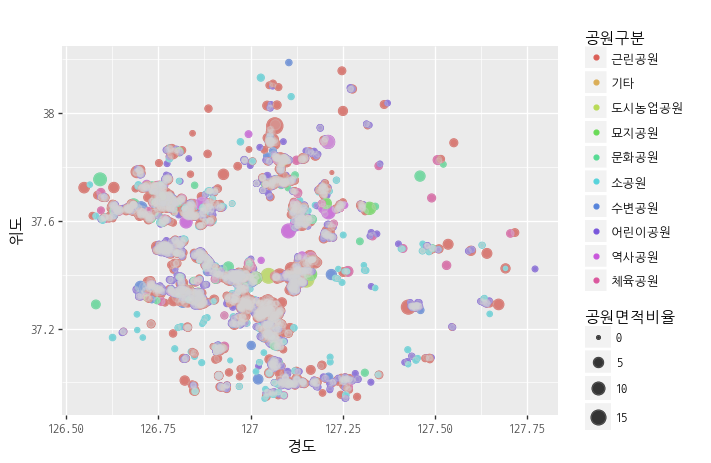

<ggplot: (-9223371874569223396)>

In [38]:
(ggplot(gg)
 + aes(x='경도', y='위도', color='공원구분', size='공원면적비율')
 + geom_point()
 + geom_jitter(color='lightgray', alpha=0.25)
 + theme(text=element_text(family='NanumGothicCoding'))
)

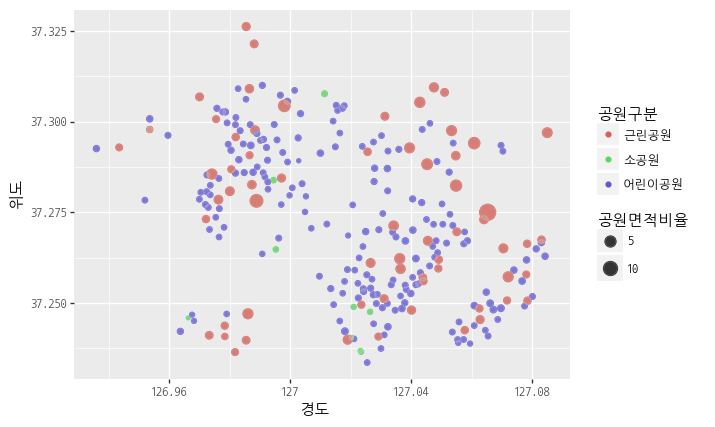

<ggplot: (-9223371874569136176)>

In [39]:
gg_suwon = gg.loc[gg['구군'] == '수원시']
(ggplot(gg_suwon)
 + aes(x='경도', y='위도', color='공원구분', size='공원면적비율')
 + geom_point()
 + geom_jitter(color='lightgray', alpha=0.25)
 + theme(text=element_text(family='NanumGothicCoding'))
)

In [40]:
geo_df = gg_suwon
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    park_name = geo_df.loc[n, '공원명'] + '-' + geo_df.loc[n, '소재지도로명주소']
    icon_color = 'blue'
    folium.CircleMarker(
        location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
        radius=geo_df['공원면적비율'][n],
        popup=park_name,
        color=icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)
    
map   
map.save('../data/data분석/suwon.html') # 맵저장

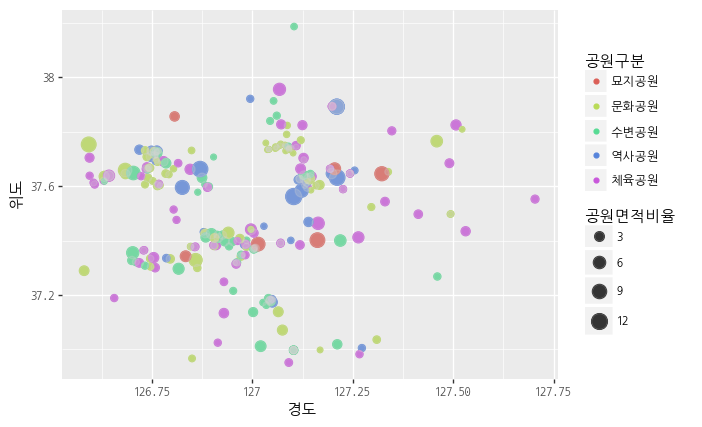

<ggplot: (-9223371874561942244)>

In [41]:
# 1. 경기도 일부 공원만 보기
park_type = r'.*((역사|체육|수변|문화|묘지)공원).*'
gg_sample = gg.loc[gg['공원구분'].str.match(park_type)]
gg_sample.shape

(ggplot(gg_sample)
 + aes(x='경도', y='위도', color='공원구분', size='공원면적비율')
 + geom_point()
 + geom_jitter(color='lightgray', alpha=0.25)
 + theme(text=element_text(family='NanumGothicCoding'))
)

In [42]:
# 경기도 일부 공원만 지도에 표기
# folium이용 지리정보 출력
gg_df = gg_sample

map = folium.Map(
        location=[gg_df['위도'].mean(), gg_df['경도'].mean()],
        zoom_start = 10
)

for n in gg_df.index:
    park_name = gg_df.loc[n, '공원명'] + '-' + gg_df.loc[n, '소재지도로명주소']
    #print(park_name)   
    icon_color = 'blue'
    folium.CircleMarker(
        location = [gg_df.loc[n, '위도'], gg_df.loc[n, '경도']],
        radius = gg_df['공원면적비율'][n],
        popup = park_name,
        color = icon_color,
        fill = True,
        fill_color = icon_color
    ).add_to(map)

map.save('../data/data분석/map.html')
map

##### 연습문제 : 서울시 관할 공원 분포

In [43]:
seoul = park[park['시도'] == '서울특별시']
seoul.shape

(1330, 15)

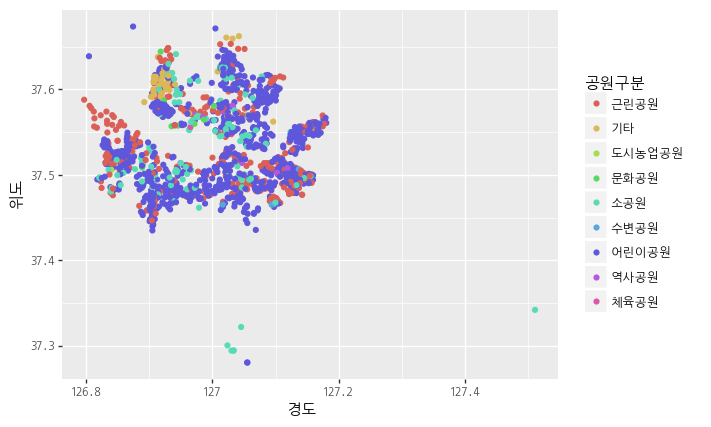

<ggplot: (-9223371874561807712)>

In [45]:
(ggplot(seoul)
 + aes(x='경도', y='위도', color='공원구분') 
 + geom_point()
 + theme(text=element_text(family='NanumGothicCoding'))
)

In [46]:
seoul[(seoul["경도"] > 127.2) | (seoul["위도"] < 37.4)]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도,구군
5227,11215-10514,세모꼴공원,소공원,서울특별시 광진구 자양1동 859-1,서울특별시 광진구 자양1동 859-1,37.321880,127.04541,862.0,02-450-7775,2018-02-23,3040000,서울특별시 광진구,0.293598,서울특별시,광진구
9374,11260-00051,코오롱하늘채앞소공원,소공원,서울특별시 중랑구 면목동 1537-1,서울특별시 중랑구 면목동 1537-1,37.341883,127.51097,1221.8,02-2094-2364,2018-10-08,3060000,서울특별시 중랑구,0.349543,서울특별시,중랑구
12072,11680-00129,역삼미소공원,소공원,서울특별시 강남구 역삼동 711-5,서울특별시 강남구 역삼동 711-5,37.300300,127.02380,576.0,02-3423-6245,2018-08-27,3220000,서울특별시 강남구,0.240000,서울특별시,강남구
12073,11680-00130,도곡햇살공원,소공원,서울특별시 강남구 도곡동 538-4,서울특별시 강남구 도곡동 538-4,37.294200,127.03020,558.5,02-3423-6245,2018-08-27,3220000,서울특별시 강남구,0.236326,서울특별시,강남구
12074,11680-00131,도담공원,어린이공원,서울특별시 강남구 세곡동 548,서울특별시 강남구 세곡동 548,37.280200,127.05550,4282.7,02-3423-6247,2018-08-27,3220000,서울특별시 강남구,0.654423,서울특별시,강남구
12075,11680-00132,행복공원,어린이공원,서울특별시 강남구 세곡동 546,서울특별시 강남구 세곡동 546,37.280200,127.05490,2483.5,02-3423-6247,2018-08-27,3220000,서울특별시 강남구,0.498347,서울특별시,강남구
12076,11680-00133,대치에스케이뷰1 소공원,소공원,서울특별시 강남구 대치동 1029-2,서울특별시 강남구 대치동 1029-2,37.294400,127.03370,302.0,02-3423-6244,2018-08-27,3220000,서울특별시 강남구,0.173781,서울특별시,강남구
12077,11680-00134,대치에스케이뷰2 소공원,소공원,서울특별시 강남구 대치동 1029-3,서울특별시 강남구 대치동 1029-3,37.294100,127.03350,481.0,02-3423-6244,2018-08-27,3220000,서울특별시 강남구,0.219317,서울특별시,강남구


In [47]:
seoul['공원구분'].value_counts()

어린이공원     824
근린공원      306
소공원       131
기타         45
문화공원        9
역사공원        9
수변공원        4
체육공원        1
도시농업공원      1
Name: 공원구분, dtype: int64

In [48]:
seoul[(seoul["경도"] > 127.2) | (park["위도"] < 37.4)]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도,구군
5227,11215-10514,세모꼴공원,소공원,서울특별시 광진구 자양1동 859-1,서울특별시 광진구 자양1동 859-1,37.321880,127.04541,862.0,02-450-7775,2018-02-23,3040000,서울특별시 광진구,0.293598,서울특별시,광진구
9374,11260-00051,코오롱하늘채앞소공원,소공원,서울특별시 중랑구 면목동 1537-1,서울특별시 중랑구 면목동 1537-1,37.341883,127.51097,1221.8,02-2094-2364,2018-10-08,3060000,서울특별시 중랑구,0.349543,서울특별시,중랑구
12072,11680-00129,역삼미소공원,소공원,서울특별시 강남구 역삼동 711-5,서울특별시 강남구 역삼동 711-5,37.300300,127.02380,576.0,02-3423-6245,2018-08-27,3220000,서울특별시 강남구,0.240000,서울특별시,강남구
12073,11680-00130,도곡햇살공원,소공원,서울특별시 강남구 도곡동 538-4,서울특별시 강남구 도곡동 538-4,37.294200,127.03020,558.5,02-3423-6245,2018-08-27,3220000,서울특별시 강남구,0.236326,서울특별시,강남구
12074,11680-00131,도담공원,어린이공원,서울특별시 강남구 세곡동 548,서울특별시 강남구 세곡동 548,37.280200,127.05550,4282.7,02-3423-6247,2018-08-27,3220000,서울특별시 강남구,0.654423,서울특별시,강남구
12075,11680-00132,행복공원,어린이공원,서울특별시 강남구 세곡동 546,서울특별시 강남구 세곡동 546,37.280200,127.05490,2483.5,02-3423-6247,2018-08-27,3220000,서울특별시 강남구,0.498347,서울특별시,강남구
12076,11680-00133,대치에스케이뷰1 소공원,소공원,서울특별시 강남구 대치동 1029-2,서울특별시 강남구 대치동 1029-2,37.294400,127.03370,302.0,02-3423-6244,2018-08-27,3220000,서울특별시 강남구,0.173781,서울특별시,강남구
12077,11680-00134,대치에스케이뷰2 소공원,소공원,서울특별시 강남구 대치동 1029-3,서울특별시 강남구 대치동 1029-3,37.294100,127.03350,481.0,02-3423-6244,2018-08-27,3220000,서울특별시 강남구,0.219317,서울특별시,강남구


In [49]:
seoul = seoul.loc[(seoul['위도'] > 32 ) & (seoul['경도'] < 127.2) & seoul['시도'].notnull()]
seoul.shape

(1329, 15)

In [50]:
seoul_playground = park.loc[(park['공원구분'] == '어린이공원') & (park['시도'] == '서울특별시')]
seoul_playground.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,공원면적비율,시도,구군
1623,11710-00011,새마을,어린이공원,서울특별시 송파구 잠실본동 209-4,서울특별시 송파구 잠실본동 209-4,37.508222,127.086662,1667.3,02-2147-3380,2018-08-17,3230000,서울특별시 송파구,0.408326,서울특별시,송파구
1624,11710-00012,뽕밭,어린이공원,서울특별시 송파구 잠실본동 220,서울특별시 송파구 잠실본동 220,37.507800,127.081083,1125.6,02-2147-3380,2018-08-17,3230000,서울특별시 송파구,0.335500,서울특별시,송파구
1625,11710-00013,삼밭나루,어린이공원,서울특별시 송파구 삼전동 95,서울특별시 송파구 삼전동 95,37.505114,127.091719,1434.1,02-2147-3380,2018-08-17,3230000,서울특별시 송파구,0.378695,서울특별시,송파구
1626,11710-00014,삼학사,어린이공원,서울특별시 송파구 삼전동 110-7,서울특별시 송파구 삼전동 110-7,37.506128,127.095495,1648.0,02-2147-3380,2018-08-17,3230000,서울특별시 송파구,0.405956,서울특별시,송파구
1627,11710-00015,진달래,어린이공원,서울특별시 송파구 잠실본동 338,서울특별시 송파구 잠실본동 338,37.503688,127.086326,1738.1,02-2147-3380,2018-08-17,3230000,서울특별시 송파구,0.416905,서울특별시,송파구


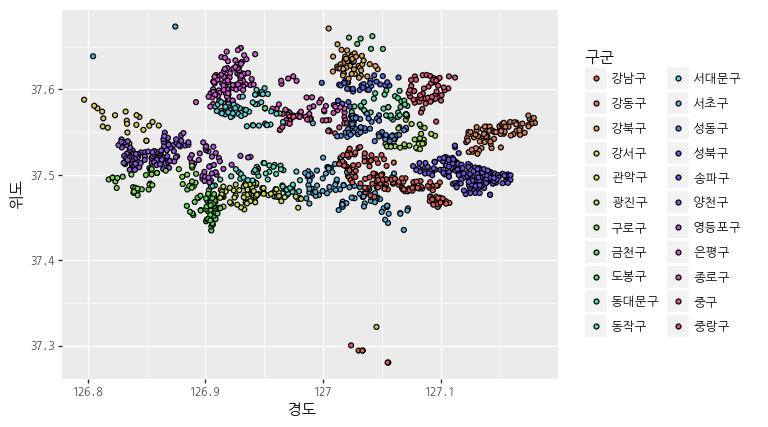

<ggplot: (-9223371874569143772)>

In [51]:
(ggplot(seoul)
 + aes(x='경도', y='위도', fill='구군')
 + geom_point()
 + theme(text=element_text(family='NanumGothicCoding'))
)

###### 구별 공원 분포

In [53]:
gu = '강남구 강동구 강북구 강서구 관악구 광진구 구로구 금천구 노원구 도봉구 동대문구 동작구 마포구 서대문구 서초구 성동구 성북구 송파구 양천구 영등포구 용산구 은평구 종로구 중구 중랑구'
gu = gu.split(' ')
print('서울에는 {}개의 구가 있습니다'.format(len(gu)))

서울에는 25개의 구가 있습니다


In [54]:
# 무악동이 구군 데이터에 잘못 들어와 있다. 전처리 해줄 필요가 있다.
seoul_gu = seoul['구군'].value_counts().reset_index()
seoul_gu_count = seoul_gu.shape[0]
seoul_gu.head()

,index,구군
0,송파구,150
1,강남구,134
2,서초구,112
3,은평구,99
4,양천구,94


In [66]:
seoul_gu.columns = ['구군', '합계']
seoul_gu = seoul_gu.sort_values(by='합계', ascending=False)
# 누락된 구를 찾기 위해 데이터프레임에 들어있는 구군을 추출한다.
seoul_gu_unique = seoul_gu['구군'].unique()
seoul_gu_unique

array(['송파구', '강남구', '서초구', '은평구', '양천구', '관악구', '강동구', '중랑구', '서대문구',
       '금천구', '동작구', '성동구', '구로구', '강북구', '동대문구', '성북구', '광진구', '영등포구',
       '종로구', '중구', '강서구', '도봉구'], dtype=object)

In [67]:
exclude_gu = [g for g in gu if not g in seoul_gu_unique] 
print('누락된 구: {}'.format(exclude_gu))
error_gu = [g for g in seoul_gu_unique if not g in gu] 
print('잘못들어간 구: {}'.format(error_gu))
# 전체 구에서 누락된 구와 잘못들어간 구를 제외하고 계산해 본다.
seoul_gu_count = len(gu) - len(exclude_gu) - len(error_gu)
print('아래 데이터를 보니 몇개 구가 누락된것을 알 수 있다. 전체 {}개 구 중 {}개 구만 있다.'.format(len(gu), seoul_gu_count))
seoul_gu

누락된 구: ['노원구', '마포구', '용산구']
잘못들어간 구: []
아래 데이터를 보니 몇개 구가 누락된것을 알 수 있다. 전체 25개 구 중 22개 구만 있다.


,구군,합계
0,송파구,150
1,강남구,134
2,서초구,112
3,은평구,99
4,양천구,94
5,관악구,76
6,강동구,74
7,중랑구,51
8,서대문구,50
9,금천구,50


###### 강남3구 공원 분포

In [68]:
# 위 데이터에서는 송파, 서초, 양천, 강남구에 공원이 많은 것으로 보여진다.
# 강남3구는 공원만 표시
geo_df = seoul.loc[seoul['구군'].str.match( r'((강남|서초|송파)구)')]
geo_df = geo_df.loc[(geo_df['위도'].notnull()) & (geo_df['경도'].notnull())]
geo_df.isnull().sum()

관리번호        0
공원명         0
공원구분        0
소재지도로명주소    0
소재지지번주소     0
위도          0
경도          0
공원면적        0
전화번호        0
데이터기준일자     0
제공기관코드      0
제공기관명       0
공원면적비율      0
시도          0
구군          0
dtype: int64

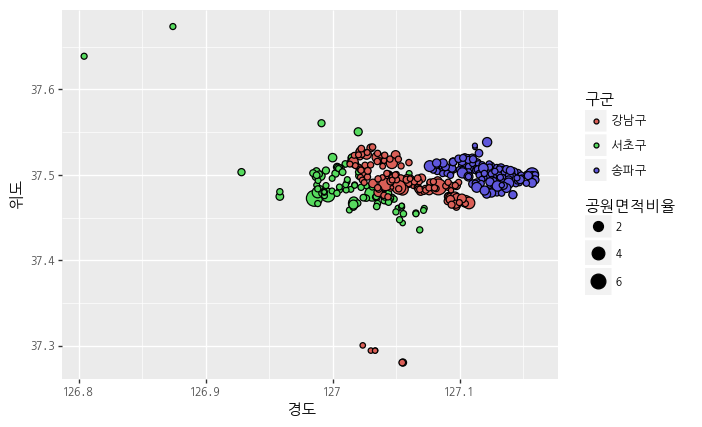

<ggplot: (-9223371874563053440)>

In [69]:
# 서초구 데이터에 잘못된 위경도 데이터가 존재
(ggplot(geo_df)
 + aes(x='경도', y='위도', fill='구군', size='공원면적비율')
 + geom_point()
 + theme(text=element_text(family='NanumGothicCoding'))
)

In [70]:
# 서울에는 주로 어떤 공원이 있을까?
seoul['공원구분'].value_counts()

어린이공원     824
근린공원      306
소공원       130
기타         45
문화공원        9
역사공원        9
수변공원        4
체육공원        1
도시농업공원      1
Name: 공원구분, dtype: int64

In [71]:
display(park.columns)
park_sq = seoul[['시도', '구군', '공원면적']]
park_sq.head()

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '전화번호', '데이터기준일자', '제공기관코드', '제공기관명', '공원면적비율', '시도', '구군'],
      dtype='object')

,시도,구군,공원면적
1613,서울특별시,송파구,182420.0
1614,서울특별시,송파구,1651.3
1615,서울특별시,송파구,285757.6
1616,서울특별시,송파구,6613.3
1617,서울특별시,송파구,6607.6


###### 제주도

In [72]:
jeju = park[park['시도'] == '제주특별자치도']
jeju.shape

(245, 15)

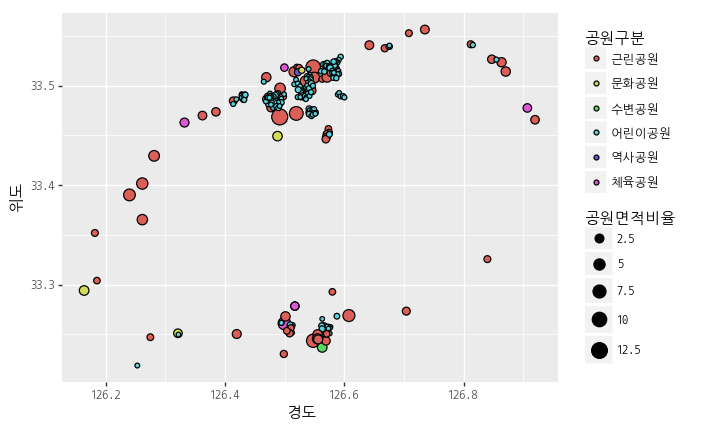

<ggplot: (-9223371874563050824)>

In [73]:
(ggplot(jeju)
 + aes(x='경도', y='위도', fill='공원구분', size='공원면적비율')
 + geom_point()
 + theme(text=element_text(family='NanumGothicCoding'))
)

In [74]:
geo_df = jeju

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=10)

for n in geo_df.index:
    park_name = geo_df.loc[n, '공원명'] + ' - ' + geo_df.loc[n, '소재지도로명주소']
    icon_color = 'red'
    folium.CircleMarker(
        location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
        radius=geo_df.loc[n, '공원면적비율'],
        popup=park_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

map

###### GeoJson

* geoJson을 활용하여 다각형을 표현할 수 있다.
* 행정구역같은 경계선이나 경로를 표현하는데 효율적이다.
* 서울시 행정구역 데이터(seoul_muncipalities_geo.json)를 이용

In [65]:
import folium
import json

map = folium.Map(
    location=[37.5838699,127.0565831],
    zoom_start=10
)

with open('../data/data분석/seoul_municipalities_geo.json', mode='rt', encoding='utf-8') as f:
    geo = json.loads(f.read())

# geo
folium.GeoJson(
    geo,
    name='seoul_municipalities'
).add_to(map)
map.save('../data/data분석/seoul_map.html')
map

In [60]:
%pwd

'd:\\gilbaek\\python'